In [259]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [260]:
from PIL import Image
import cv2
import numpy as np

# Read Image

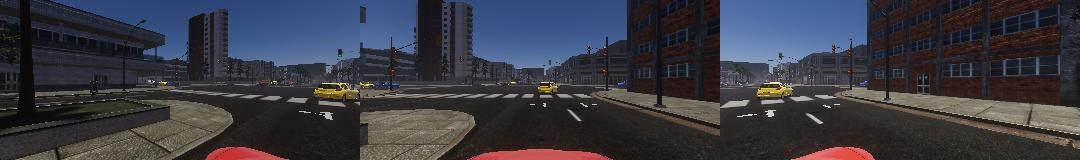

In [261]:
path = r"D:\cars\SIM\WindowsV25-2\Data\Dataset25\IMG\CapturedImage276.jpg"
image = Image.open(path)
image

# Ego Car

In [262]:
from ego_car import EgoCar
car = EgoCar()

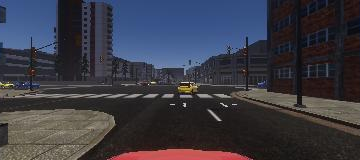

In [263]:
image_l, image_c, image_r = car.splitter(image)
image_c

In [264]:
# image_c = image_c.crop((0, 70, image_c.width, image_c.height))
# image_c

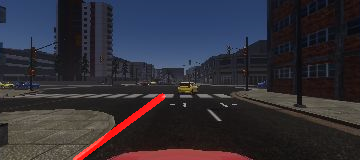

In [265]:
lanes_c, left_lane, right_lane = car.find_lanes(np.array(image_c))
lanes_c = Image.fromarray(lanes_c)
lanes_c

In [266]:
left_lane, right_lane

([(75, 160), (162, 96)], [])

# Intersection

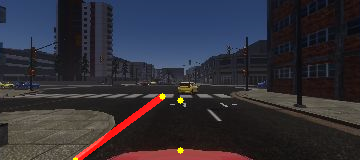

In [267]:
from common_utils import four_point_transform, draw_points

im = lanes_c
single_width = im.width

left_lane_back, left_lane_front = left_lane
# right_lane_back, right_lane_front = right_lane

# (single_width // 2, im.height - 60), (single_width // 2, im.height - 10),
image_center_front, image_center_back = (180, 100), (180, 150)

pts = np.array([
    image_center_front, 
    image_center_back,
        
    left_lane_back,
    left_lane_front,
    # right_lane_back,
    # right_lane_front,

    # center of front points
    # (left_lane_front[0] + (right_lane_front[0] - left_lane_front[0]) // 2, left_lane_front[1]),
    ])


image_np = np.array(im)
image_np = draw_points(image_np, pts)

Image.fromarray(image_np)

In [268]:
car.find_steer2(left_lane, right_lane)

-0.7916092636503146